In [2]:
! pip install contextily
! pip install pyproj
! pip install shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 9.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.3 MB/s eta 0:00:00


In [56]:
! pip install pandana

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 8.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 6.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 3.2 MB/s eta 0:00:00


In [137]:
pip install --upgrade osmnx


Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana 

In [2]:
pois = gpd.read_file("clean_pois_montreal.geojson")


In [3]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [4]:
# calculate the centroid of each POI (as there are some multipolygons in the data, we need to calculate the centroid of each polygon)
pois['geometry'] = pois['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_1250/2224851895.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois['geometry'] = pois['geometry'].centroid


In [5]:
# check crs of the pois
print(pois.crs)   

EPSG:4326


In [6]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [7]:
polygons = gpd.read_file("district_polygons.geojson")

In [8]:
# check crs of the polygons
print(polygons.crs)

EPSG:4326


In [9]:
# calculate the centroid of each polygon of neighborhoods
polygons['centroids'] = polygons['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_1250/442998505.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['centroids'] = polygons['geometry'].centroid


In [10]:
polygons.head()

,Arrondissement,geometry,centroids
0,Ahuntsic-Cartierville,"MULTIPOLYGON (((-73.75198 45.51723, -73.75238 ...",POINT (-73.67738 45.54422)
1,Anjou,"POLYGON ((-73.60235 45.61259, -73.60142 45.612...",POINT (-73.56535 45.61250)
2,Côte-des-Neiges–Notre-Dame-de-Grâce,"POLYGON ((-73.61454 45.48366, -73.61240 45.482...",POINT (-73.63178 45.48489)
3,L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Ro...,"MULTIPOLYGON (((-73.75291 45.50364, -73.75307 ...",POINT (-73.87869 45.48677)
4,LaSalle,"MULTIPOLYGON (((-73.63221 45.41484, -73.63203 ...",POINT (-73.62365 45.43198)


In [11]:

# Assuming `amenities_gdf` is your GeoDataFrame containing amenities with points
# Assuming `neighbourhoods_gdf` is your GeoDataFrame containing neighborhoods with polygons

# Perform spatial join
amenities_with_neighborhood = gpd.sjoin(pois, polygons, how="left", op="within")

# Now `amenities_with_neighborhood` contains a new column 'neighbourhood' 
# which indicates the neighborhood each amenity point falls within


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [12]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)


In [13]:
amenities_with_neighborhood['Arrondissement'].value_counts()

Arrondissement
Ville-Marie                                            1551
Le Plateau-Mont-Royal                                   921
Côte-des-Neiges–Notre-Dame-de-Grâce                     827
Rosemont–La Petite-Patrie                               781
Villeray–Saint-Michel–Parc-Extension                    466
Ahuntsic-Cartierville                                   432
Le Sud-Ouest                                            390
Mercier–Hochelaga-Maisonneuve                           389
Verdun                                                  277
Saint-Laurent                                           248
L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro     190
LaSalle                                                 173
Saint-Léonard                                           151
Rivière-des-Prairies–Pointe-aux-Trembles                119
Outremont                                               116
Lachine                                                 109
Montréal-Nord            

In [24]:

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
# first, we need to create a GeoDataFrame from the centroids
# polygons = polygons.set_index('Arrondissement')
# amenities_with_neighborhood['Arrondissement'] = amenities_with_neighborhood['Arrondissement'].astype(str)
# polygons['Arrondissement'] = polygons['Arrondissement'].astype(str)

# join the centroids to the amenities
# amenities_with_neighborhood = amenities_with_neighborhood.join(polygons, on='Arrondissement', rsuffix='_centroid')

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)

# Now `amenities_with_neighborhood` contains a new column 'distance_to_centroid'
# which indicates the distance between each amenity and the centroid of the neighborhood it falls within

# Now you can filter the amenities based on the distance to the centroid
# For example, to get all amenities within 500 meters of the centroid
amenities_within_500m = amenities_with_neighborhood[amenities_with_neighborhood['distance_to_centroid'] <= 500]






/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_1250/800002308.py:11: UserWarning: The indices of the two GeoSeries are different.
  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_1250/800002308.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)


In [22]:
amenities_with_neighborhood.centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_1250/667464992.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood.centroid


0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Length: 7283, dtype: geometry

In [23]:
amenities_with_neighborhood.geometry

0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Name: geometry, Length: 7283, dtype: geometry

In [25]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids,distance_to_centroid
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.000000
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091483
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.044636
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091192
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.107767


In [26]:
amenities_with_neighborhood['distance_to_centroid'].describe()

count    18.000000
mean      0.066927
std       0.037825
min       0.000000
25%       0.045595
50%       0.070577
75%       0.091411
max       0.132553
Name: distance_to_centroid, dtype: float64

In [43]:
place = "Montreal, Canada"
G = ox.graph_from_place(place, network_type="drive")
Gp = ox.project_graph(G)

In [44]:
# find each nearest node to several points, and optionally return distance
nodes, dists = ox.nearest_nodes(Gp, anjou.geometry.x, anjou.geometry.y, return_dist=True)

In [47]:
# append the nearest node to each point to the GeoDataFrame
anjou['nearest_node'] = nodes

# append the distance to each point to the GeoDataFrame
anjou['distance'] = dists

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [49]:
anjou['distance']

93      5.066450e+06
94      5.066450e+06
95      5.066450e+06
96      5.066450e+06
809     5.066450e+06
1101    5.066450e+06
1236    5.066450e+06
1253    5.066450e+06
1257    5.066450e+06
1260    5.066450e+06
1261    5.066450e+06
1275    5.066450e+06
1277    5.066450e+06
1529    5.066450e+06
1532    5.066450e+06
1615    5.066450e+06
1616    5.066450e+06
1665    5.066450e+06
1698    5.066450e+06
1699    5.066450e+06
1836    5.066450e+06
1837    5.066450e+06
2321    5.066450e+06
3557    5.066450e+06
3750    5.066450e+06
3765    5.066450e+06
3894    5.066450e+06
3970    5.066450e+06
4331    5.066450e+06
5772    5.066450e+06
5773    5.066450e+06
5774    5.066450e+06
5775    5.066450e+06
5776    5.066450e+06
5777    5.066450e+06
5876    5.066450e+06
6144    5.066450e+06
6150    5.066450e+06
6162    5.066450e+06
6423    5.066450e+06
6424    5.066450e+06
6425    5.066450e+06
6715    5.066450e+06
6759    5.066450e+06
6857    5.066450e+06
6984    5.066450e+06
6997    5.066450e+06
7124    5.066

In [42]:
# Filter 'anjou' GeoDataFrame to get only the rows where 'arrondissement' is equal to 'anjou'
anjou_centroid = centroids[centroids['arrondissement'] == 'Anjou']

print(anjou_centroid)

# Define the coordinates of the main centroid node for the 'anjou' neighborhood
main_centroid_coords = (anjou_centroid.centroid.y.values[0], anjou_centroid.centroid.x.values[0])

# Create a network graph around the main centroid node
G = ox.graph_from_point(main_centroid_coords, dist=1000, network_type='all', simplify=True)

# Calculate the nearest node to the main centroid node
nearest_node_main_centroid = ox.distance.nearest_nodes(G, main_centroid_coords[1], main_centroid_coords[0])

# Iterate over each point in the 'centroid' column of 'anjou'
for idx, point_coords in enumerate(anjou['centroid']):
    # Find the nearest node to the current point
    nearest_node_point = ox.distance.nearest_nodes(G, point_coords.y, point_coords.x)
    
    # Calculate the distance between the current point and the main centroid node
    distance_to_main_centroid = ox.distance.great_circle_vec(
        G.nodes[nearest_node_main_centroid]['y'], G.nodes[nearest_node_main_centroid]['x'],
        G.nodes[nearest_node_point]['y'], G.nodes[nearest_node_point]['x']
    )
    
    print(f"Distance from centroid {idx+1} to main centroid: {distance_to_main_centroid:.2f} meters")





  Abreviation arrondissement  id                              geometry
1          AJ          Anjou   3  POINT (-8189257.88618 5718468.78424)


/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_9775/1602312914.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  main_centroid_coords = (anjou_centroid.centroid.y.values[0], anjou_centroid.centroid.x.values[0])


RuntimeError: Unable to determine UTM CRS

In [39]:
# Define the coordinates of your points
point1_coords = (45.59669, -73.55466)  # Latitude and longitude of point 1
point2_coords = (45.59710, -73.55460)  # Latitude and longitude of point 2

# Create a network graph around the first point
G = ox.graph_from_point(point1_coords, dist=100, network_type='all', simplify=True)

# Find the nearest node to each point
nearest_node_point1 = ox.distance.nearest_nodes(G, point1_coords[1], point1_coords[0])
nearest_node_point2 = ox.distance.nearest_nodes(G, point2_coords[1], point2_coords[0])

# Get the latitude and longitude coordinates of the nearest nodes
node1_coords = G.nodes[nearest_node_point1]['y'], G.nodes[nearest_node_point1]['x']
node2_coords = G.nodes[nearest_node_point2]['y'], G.nodes[nearest_node_point2]['x']

# Calculate the distance between the nearest nodes
distance_between_nodes = ox.distance.great_circle_vec(*node1_coords, *node2_coords)

print("Distance between the nearest nodes:", distance_between_nodes, "meters")


Distance between the nearest nodes: 42.766349882858 meters


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/skl

In [36]:
print("OSMnx version:", ox.__version__)

OSMnx version: 1.9.2


In [11]:
# following is taken from exercise 10 solutions 

In [50]:
place = 'Montreal, Canada'
G_walk = ox.graph_from_place(place, network_type='walk')

In [51]:
# specify parameters for the analysis
walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


In [52]:
# set a uniform walking speed on every edge
for u, v, data in G_walk.edges(data=True):
    data['speed_kph'] = walk_speed
G_walk = ox.add_edge_travel_times(G_walk) # this computes the travel time in seconds based on the 'speed_kph' column

In [53]:
# Get all the "fresh food" stores on OSM within the study site
tags = {'shop': ['grocery', 'greengrocer', 'supermarket']}


amenities = ox.geometries_from_place(place,
                                    tags=tags)

amenities = amenities.to_crs('EPSG:25832')

amenities.shape

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_9775/81232785.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenities = ox.geometries_from_place(place,


(347, 98)

In [54]:
amenities.head()

name         shop  \
element_type osmid                                           
node         189770195                 Sharmi  supermarket   
             221063335                Provigo  supermarket   
             237578368         PA Supermarché  supermarket   
             237578374  PA Nature Supermarché  supermarket   
             424780619                    IGA  supermarket   

                                                geometry    brand  \
element_type osmid                                                  
node         189770195  POINT (-4968194.738 9204111.844)      NaN   
             221063335  POINT (-4972624.682 9192364.858)  Provigo   
             237578368  POINT (-4975354.874 9193018.109)      NaN   
             237578374  POINT (-4971461.402 9195128.873)      NaN   
             424780619  POINT (-4972634.397 9191423.556)      IGA   

                       brand:wikidata        brand:wikipedia  check_date  \
element_type osmid                                                         
node         189770195            NaN                    NaN         NaN   
             221063335       Q3408306             en:Provigo  2023-09-22   
             237578368            NaN                    NaN         NaN   
             237578374            NaN                    NaN         NaN   
             424780619       Q3146662  en:IGA (supermarkets)         NaN   

                            opening_hours payment:apple_pay payment:cash  ...  \
element_type osmid                                                        ...   
node         189770195                NaN               NaN          NaN  ...   
             221063335  Mo-Su 08:00-23:00               yes          yes  ...   
             237578368  Mo-Su 08:00-22:00               NaN          NaN  ...   
             237578374                NaN               NaN          NaN  ...   
             424780619        08:00-21:00               NaN          NaN  ...   

                       payment:notes roof:levels roof:shape toilets architect  \
element_type osmid                                                              
node         189770195           NaN         NaN        NaN     NaN       NaN   
             221063335           NaN         NaN        NaN     NaN       NaN   
             237578368           NaN         NaN        NaN     NaN       NaN   
             237578374           NaN         NaN        NaN     NaN       NaN   
             424780619           NaN         NaN        NaN     NaN       NaN   

                       building:material roof:material wikidata  url indoor  
element_type osmid                                                           
node         189770195               NaN           NaN      NaN  NaN    NaN  
             221063335               NaN           NaN      NaN  NaN    NaN  
             237578368               NaN           NaN      NaN  NaN    NaN  
             237578374               NaN           NaN      NaN  NaN    NaN  
             424780619               NaN           NaN      NaN  NaN    NaN  

[5 rows x 98 columns]

In [76]:
pois.to_crs('EPSG:25832', inplace=True)

In [77]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-4969379.074 9203051.669)
1,node,190646563,None,post_box,None,Post,POINT (-4969347.157 9203007.507)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-4968676.240 9204153.871)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-4968547.713 9204118.775)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-4968423.257 9204159.809)


In [80]:
# construct the pandana network
# For this we first need the nodes and edges as geodataframes

G_walk = ox.project_graph(G_walk, to_crs='EPSG:25832')

nodes = ox.graph_to_gdfs(G_walk, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(G_walk, nodes=False).reset_index()[['u', 'v', 'travel_time']]

network = pandana.Network(node_x=nodes['x'],
                          node_y=nodes['y'], 
                          edge_from=edges['u'],
                          edge_to=edges['v'],
                          edge_weights=edges[['travel_time']])

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 146027
Setting CH edge vector of size 469342
Range graph removed 474468 edges of 938684
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [78]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-4969379.074 9203051.669)
1,node,190646563,None,post_box,None,Post,POINT (-4969347.157 9203007.507)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-4968676.240 9204153.871)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-4968547.713 9204118.775)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-4968423.257 9204159.809)


In [81]:
network.poi_category_names

[]

In [85]:
centroids = pois.centroid



In [86]:
centroids.head()

0    POINT (-4969379.074 9203051.669)
1    POINT (-4969347.157 9203007.507)
2    POINT (-4968676.240 9204153.871)
3    POINT (-4968547.713 9204118.775)
4    POINT (-4968423.257 9204159.809)
dtype: geometry

In [87]:
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
# centroids = amenities.centroid

# set the amenities' locations on the network 
network.set_pois(category='Restaurant/cafe',
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)


In [89]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='Restaurant/cafe',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
26232418,9,9,9
1653821632,4,5,13
11322670493,3,3,14
11340718245,4,12,12
11340718237,5,5,5


The `distances` dataframe contains the osmid of each node and the distance in seconds to the three closest amenities (based on our provided walking speed).

OSMnx works with travel distances in seconds, but let's convert it to minutes for a more meaningful value:

In [90]:
distances['travel_time'] = distances[1] / 60

In [96]:
distances

,1,2,3,travel_time
osmid,,,,
26232418,9.000000,9.000000,9.100000,0.150000
1653821632,4.900000,5.900000,13.700000,0.081667
11322670493,3.500000,3.500000,14.000000,0.058333
11340718245,4.900000,12.600000,12.600000,0.081667
11340718237,5.200000,5.200000,5.800000,0.086667
...,...,...,...,...
11815325256,0.000000,324.299988,337.200012,0.000000
11813873458,171.199997,240.000000,338.200012,2.853333
11813877688,171.100006,194.699997,253.399994,2.851667


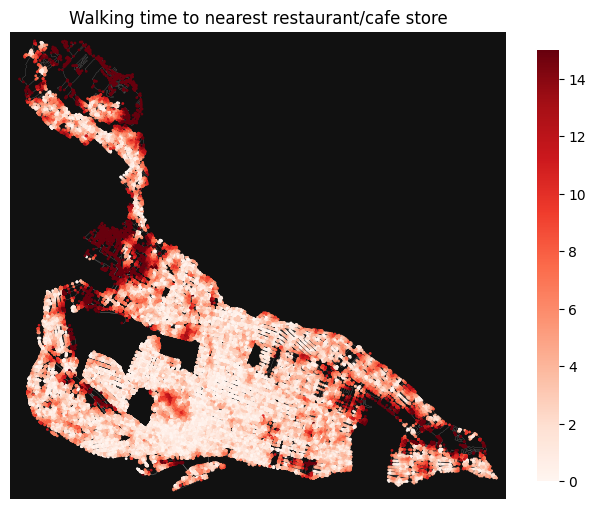

In [94]:
# Plot distance to nearest amenity from each node
fig, ax = ox.plot_graph(G_walk, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='Reds')

ax.set_title('Walking time to nearest restaurant/cafe store')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')


In [97]:

# set the amenities' locations on the network 
network.set_pois(category='Culture',
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)

In [98]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='Culture',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
26232418,9,9,9
1653821632,4,5,13
11322670493,3,3,14
11340718245,4,12,12
11340718237,5,5,5


In [99]:
distances['travel_time'] = distances[1] / 60

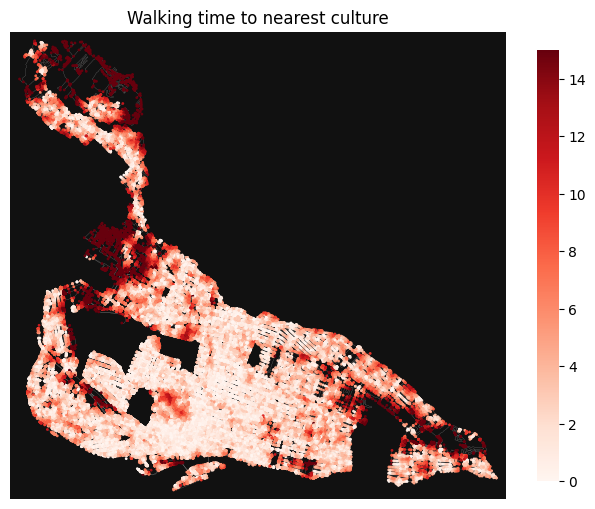

In [100]:
# Plot distance to nearest amenity from each node
fig, ax = ox.plot_graph(G_walk, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='Reds')

ax.set_title('Walking time to nearest culture')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')